# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

b) Calcule a correlação entre os dados da **p1** e **p2**

c) Calcule a correlação entre os dados transformados (média e diferença)

d) Comente as correlações observadas.

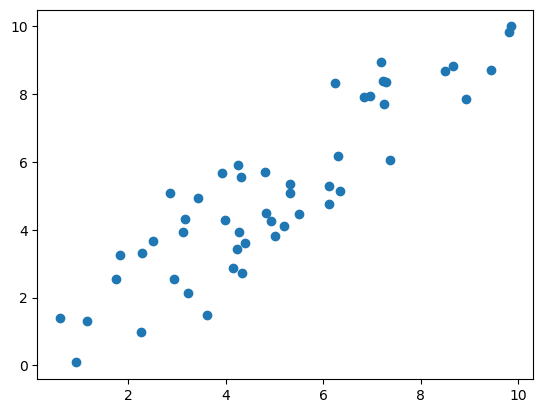

In [18]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})
#Plotando
plt.scatter(x = df.p1, y=df.p2);
plt.show()

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

In [30]:
# Matriz de transformação
m = np.array([[.5,.5],   # Média
              [-1, 1]])  # Diferença

# Cálculo da média e diferença entre p1 e p2 através de multiplicação matricial
df['média'], df['diferença'] = np.matmul(m, df[['p1', 'p2']].to_numpy().transpose())

(df.style  # Configurar o estilo do dataframe
   .format(precision=2,  # Definir a precisão para 2 casas decimais
           decimal=',')
   .bar(subset='diferença',  # Estilização da coluna 'diferença' com barras coloridas para visualizar valores positivos e negativos
        color=['pink', 'lightblue'], 
        align='zero'))

,p1,p2,média,diferença,evolução,soma
0,"6,96","7,94","7,45","0,98","0,98","14,91"
1,"2,86","5,10","3,98","2,24","2,24","7,96"
2,"2,27","0,97","1,62","-1,29","-1,29","3,24"
3,"5,51","4,47","4,99","-1,04","-1,04","9,99"
4,"7,19","8,94","8,07","1,74","1,74","16,13"
5,"4,23","3,43","3,83","-0,80","-0,80","7,66"
6,"9,81","9,84","9,82","0,03","0,03","19,64"
7,"6,85","7,92","7,38","1,07","1,07","14,77"
8,"4,81","5,70","5,25","0,89","0,89","10,51"
9,"3,92","5,68","4,80","1,75","1,75","9,60"


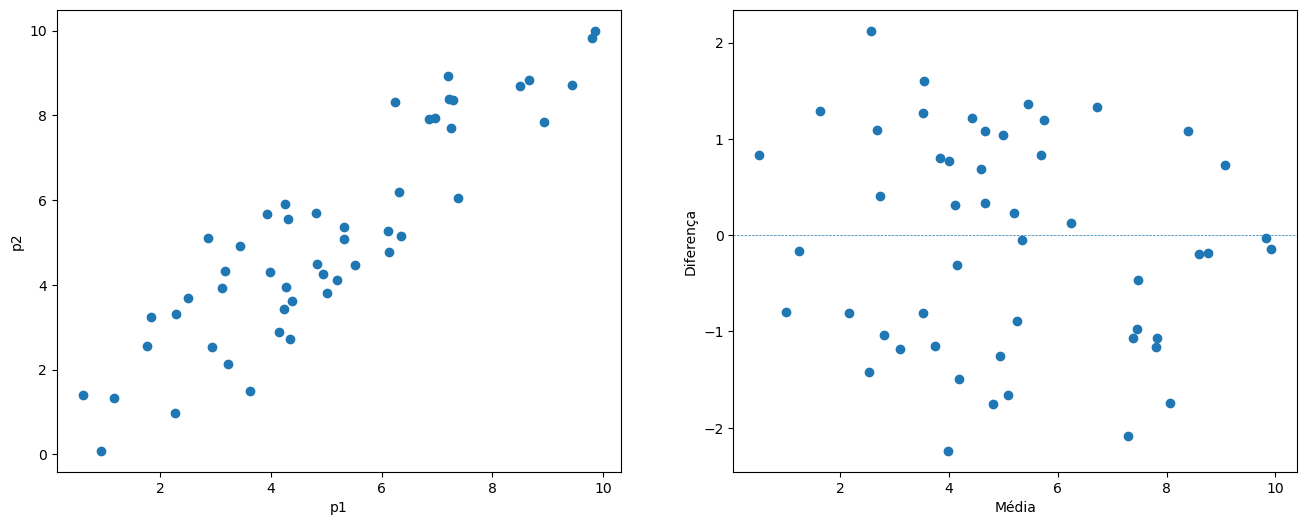

In [28]:
# Definição da figura e configuração dos eixos
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Gráfico dos valores de p1 na horizontal X p2 na vertical
scatter1 = ax[0].scatter(x=df.p1, y=df.p2)
ax[0].set_xlabel('p1')  # Legenda do eixo x
ax[0].set_ylabel('p2')  # Legenda do eixo y

# Gráfico da Média em relação a Diferença de p1 X p2
scatter2 = ax[1].scatter(x=df['média'], y=df['diferença'])
ax[1].axhline(y=0, linewidth=0.5, linestyle='--')  # Linha horizontal no valor 0
ax[1].set_xlabel('Média')  # Legenda do eixo x
ax[1].set_ylabel('Diferença')  # Legenda do eixo y

plt.show()

b) Calcule a correlação entre os dados da p1 e p2

In [9]:
print("Correlação entre p1 e p2:", df.p1.corr(df.p2))

Correlação entre p1 e p2: 0.8957365818728046


c) Calcule a correlação entre os dados transformados (média e diferença)

In [10]:
print("Correlação entre a média e a diferença:", df['média'].corr(df['diferença']))

Correlação entre a média e a diferença: 0.13347385411788837


d) Comente as correlações observadas.

**Correlação entre os dados das variáveis p1 e p2:**

A correlação de 0,89 demonstra uma forte correlação positiva entre as amostras das colunas p1 e p2. Isso significa que essas variáveis têm uma relação positiva, indicando uma forte associação e semelhança entre os dois conjuntos de dados.


**Correlação entre os dados transformados (média e diferença):**

O valor resultante de -0,13 indica uma correlação negativa relativamente baixa entre as variáveis transformadas. Isso significa que há uma relação inversa, ou seja, à medida que uma variável aumenta, a outra tende a diminuir, e vice-versa. No entanto, o valor próximo de zero (-0,13) indica uma correlação inversa fraca. Essa relação inversa pode não ser tão significativa ou previsível.

## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

In [31]:
df['soma'] = df.p1 + df.p2  # Cálculo da soma entre p1 e p2

(df.style  # Configurar o estilo do dataframe
   .format(precision=2,  # Definir a precisão para 2 casas decimais
           decimal=',')
   .bar(subset='diferença',  # Estilização da coluna 'diferença' com barras coloridas para visualizar valores positivos e negativos
        color=['pink', 'lightblue'], 
        align='zero')
   .background_gradient(subset=['média', 'soma']))  # Estilização das colunas 'média' e 'soma' com cores de acordo com os valores

,p1,p2,média,diferença,evolução,soma
0,"6,96","7,94","7,45","0,98","0,98","14,91"
1,"2,86","5,10","3,98","2,24","2,24","7,96"
2,"2,27","0,97","1,62","-1,29","-1,29","3,24"
3,"5,51","4,47","4,99","-1,04","-1,04","9,99"
4,"7,19","8,94","8,07","1,74","1,74","16,13"
5,"4,23","3,43","3,83","-0,80","-0,80","7,66"
6,"9,81","9,84","9,82","0,03","0,03","19,64"
7,"6,85","7,92","7,38","1,07","1,07","14,77"
8,"4,81","5,70","5,25","0,89","0,89","10,51"
9,"3,92","5,68","4,80","1,75","1,75","9,60"


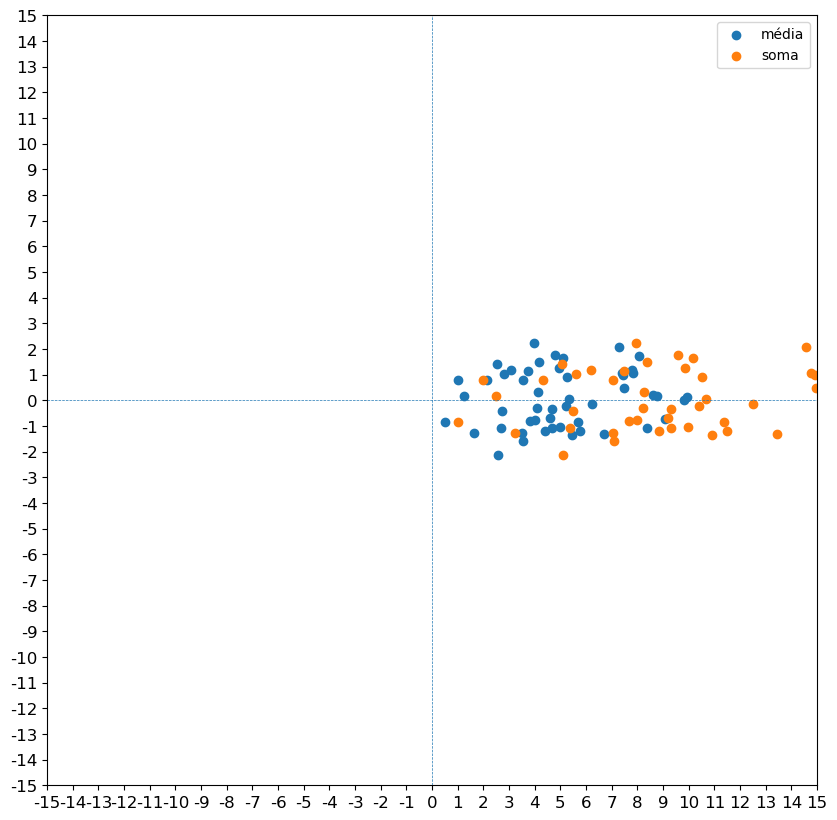

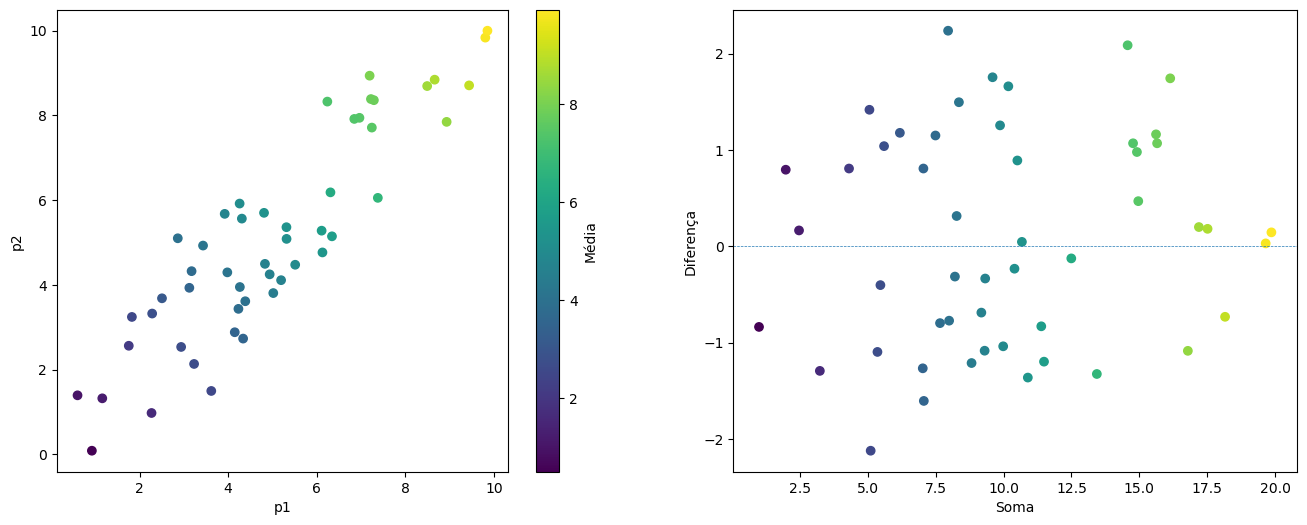

In [33]:
# Definição da figura e configuração dos eixos
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Gráfico dos valores de p1 na horizontal X p2 na vertical
scatter1 = ax[0].scatter(x=df.p1, y=df.p2, c=df['média'])
ax[0].set_xlabel('p1')  # Legenda do eixo x
ax[0].set_ylabel('p2')  # Legenda do eixo y

# Barra de cores para representar a média
cbar = fig.colorbar(scatter1, ax=ax[0])
cbar.set_label('Média')  # Legenda da barra de cores

# Gráfico da Soma em relação a Diferença de p1 X p2
scatter2 = ax[1].scatter(x=df['soma'], y=df['diferença'], c=df['média'])
ax[1].axhline(y=0, linewidth=0.5, linestyle='--')  # Linha horizontal no valor 0
ax[1].set_xlabel('Soma')  # Legenda do eixo x
ax[1].set_ylabel('Diferença')  # Legenda do eixo y

plt.show()